## Grade

<font color="green">Excellent! **100%**</font>

### Strengths

- Great, independent thinking and problem solving.
- Good use of functions. You were one of the few groups who wrote your own functions.
- This is a challenging project, in general. But you found a creative method that is doable and understandable. I like that very much.

### Weakenesses

- It would be neat to run a thousand (or million) playoff scenarios and then calculate the percentage of times each team wins the Super Bowl.
- I wonder if there are any articles that describe in detail how these models are typically calculated. Some background research on these models would be good.

This is just a general comment. You use a gaussian distribution to select a random number for 10,000 trials. Then, you count the number of wins for a team to determine the probability. But this is already determined by choosing a gaussian distribution. I think you'll calculate a percentage that simply agrees with the gaussian (if large enough N). Any variation from the gaussian prediction is due to small(ish) number of trials. If, in the future, you need to speed up your code, you can use the proportional area under the gaussian that is greater than zero to calculate the probability. (This can be determined analytically from the mean and standard deviation.) This would be an analytic approach to that part of your program, so you wouldn't have to run 10,000 trials. As a result your code would be faster, and you could run your playoffs for thousands or millions of trials to determine the probability of each team winning the Super Bowl.

In [ ]:
import random as rand #for random numbers
import numpy as np
import matplotlib.pyplot as plt
import collections

We chose to model the NFL Playoffs. We thought this would be a relevant project since the playoffs are only about a month away. It was interesting to us because we had never modeled this type of bracket situation in class. This is a monte carlo simulation because even though there are factors at play that determine who *should* win, such as past successes and recent statistics, there is still an element of randomness in who actually wins. This may be due to injuries, weather, home field advantage, etc.

The first part of our code is an array for team stats that will affect their probability of winning. What each number represents is labeled at the top of the code box.

Then, for each stat that Team 1 beats Team 2 at, the normal distribution gets shifted .1 to the right, giving Team 1 a better chance to win. If Team 1 has worse stats, the graph shifts toward the left .1 for each inferior stat, to give Team 2 a greater probability of winning. The math used in this portion is a simple > or < problem, with different returns based on which sign is true for a given situation.

The next part of the code sets up each game. The probability of Team 1 beating Team 2 is calculated by taking into account the statistics we listed and running them through the simulation 10,000 times. Then the randomness factor is accounted for by pulling a random float from -1 to 1 to determine the actual winner.

In [ ]:
#yards a game, yards allowed per game, quarterback stats, wins during the season]
#NFC
saints = [366, 284.9, 2668, 9]
packers = [392.9, 344.9, 3100, 8]
seahawks = [400, 434.9, 2986, 7]
giants = [313.8, 340.1, 2384, 4]
rams = [389.2, 297, 3021, 7]
buccaneers = [362.8, 329.9, 3300, 7]
cardinals = [403.7, 350.5, 2814, 6]

#AFC
steelers = [347.8, 306.9, 2543, 10]
chiefs = [425.8, 360.7, 3544, 10]
titans = [385.7, 384.1, 2615, 8]
bills = [372.5, 373.1, 3082, 8]
browns = [355.7, 354.9, 2228, 8]
dolphins = [311.9, 369.6, 2511, 7]
colts = [370, 311.8, 2995, 7]

#start code
mu = 0


def offense(x,y):
  global mu
  x = x[0]
  y = y[0]
  if x > y:
    mu = mu+.1
  else:
    mu = mu -.1

def defense(x,y):
  global mu
  x = x[1]
  y = y[1]
  if x < y:
    mu = mu+.1
  else:
    mu = mu -.1

def quarterback(x,y):
  global mu
  x = x[2]
  y = y[2]
  if x > y:
    mu = mu+.1
  else:
    mu = mu -.1

def wins(x,y):
  global mu
  x = x[3]
  y = y[3]
  if x > y:
    mu = mu+.1
  else:
    mu = mu -.1
def graph():
  global mu, team1W,N,r_numbers
  N=10000 #number of random numbers
  sigma=.33 #standard deviation
  r_numbers=[] #list to store random numbers
  i=0
  team1W = 0
  while i<N:
      r=rand.gauss(mu,sigma)
      if r >= 0:
        team1W = team1W +1
      r_numbers.append(r)
      i = i +1
  totalbins = 100 # number of bins used for counting random numbers in that bin
  histogram = plt.hist(r_numbers, bins=totalbins, facecolor='red', edgecolor='black', linewidth=1)
  plt.title("Outcomes of playoff games, by the numbers")
  plt.xlabel("average outcome (0.0 is a 50/50, plus lean means first team named is favored and negative lean means second team is favored")
  plt.ylabel("number of each outcome")
  plt.show()




def game1(x,y,w,z):
  global mu, team1w, team1, team2,w1,z1,team1W,N,r_numbers
  mu = 0
  team1 = x
  team2 = y
  w1 = str(w)
  z1 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("Wildcard game, game 1")
  print("Likelihood of ",w1," beating ",z1 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won")
    team1w = 1
  else:
    print(z,"won")
    team1w= 0
  return mu, team1w

def game2(x,y,w,z):
  global mu, team3w, team3, team4,w2,z2,team1W,N,r_numbers
  mu = 0
  team3 = x
  team4 = y
  w2 = str(w)
  z2 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("Wildcard game, game 2")
  print("Likelihood of ",w2," beating ",z2 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won")
    team3w= 1
  else:
    print(z,"won")
    team3w= 0
  return mu


def game3(x,y,w,z):
  global mu, team5w, team5, team6,w3,z3,team1W,N,r_numbers
  mu = 0
  w3 = str(w)
  z3 = str(z)
  team5 = x
  team6 = y
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("Divisional round game 1, winner of games 1 and 2")
  print("Likelihood of ",w3," beating ",z3 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won")
    team5w= 1
  else:
    print(z,"won")
    team5w= 0
  return mu

def game11(x,y,w,z):
  global mu, team11w, team11, team22,w11,z11,team1W,N,r_numbers
  mu = 0
  team11 = x
  team22 = y
  w11 = str(w)
  z11 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("Wildcard round, game 3")
  print("Likelihood of ",w11," beating ",z11 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won")
    team11w = 1
  else:
    print(z,"won")
    team11w= 0
  return mu



def game22(x,y,w,z):
  global mu, team33w, team33, team44,w22,z22,team1W,N,r_numbers
  mu = 0
  team33 = x
  team44 = y
  w22 = str(w)
  z22 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("Divisional game 2, winner of wildcard round game 3, and the top seed team since they get a 1st round bye")
  print("Likelihood of ",w22," beating ",z22 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won")
    team33w= 1
  else:
    print(z,"won")
    team33w= 0
  return mu

def game33(x,y,w,z):
  global mu, team55w, team55, team66,w33,z33,team1W,N,r_numbers, nfc_winner, nfc_winner_name
  mu = 0
  w33 = str(w)
  z33 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("NFC Championship, game betweens the divisional winners")
  print("Likelihood of ",w33," beating ",z33 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won, and are going to the superbowl")
    team55w= 1
    nfc_winner = x
    nfc_winner_name = w33
  else:
    print(z,"won, and are going to the superbowl")
    team55w= 0
    nfc_winner = y
    nfc_winner_name = z33
  return mu

def game333(x,y,w,z):
  global mu, team555w, team555, team666,w333,z333,team1W,N,r_numbers, afc_winner, afc_winner_name
  mu = 0
  w333 = str(w)
  z333 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("AFC Championship, game betweens the divisional winners")
  print("Likelihood of ",w333," beating ",z333 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w,"won, and are going to the superbowl")
    team555w= 1
    afc_winner = x
    afc_winner_name = w333
  else:
    print(z,"won, and are going to the superbowl")
    team55w= 0
    afc_winner = y
    afc_winner_name = z333
  return mu




def game111(x,y,w,z):
  global mu, team1w, team111, team222,w111,z111,team1W,N,r_numbers, afc_winner, afc_winner_name, nfc_winner, nfc_winner_name
  mu = 0
  team111 = x
  team222 = y
  w111 = str(w)
  z111 = str(z)
  offense(x,y)
  defense(x,y)
  quarterback(x,y)
  wins(x,y)
  graph()
  print("THE SUPERBOWL")
  print("Likelihood of ",w111," beating ",z111 ,"is ", team1W/N*100, "%")
  if r_numbers[-500]>0:
    print(w111,"won the superbowl")
    team1w = 1
  else:
    print(z111,"won the superbowl")
    team1w= 0
  return mu




Now the games are actually ran, using team seeds as of Nov 30, and starting with the NFC. This code represents advancement in the bracket, modeling which teams move on and end up playing each other.

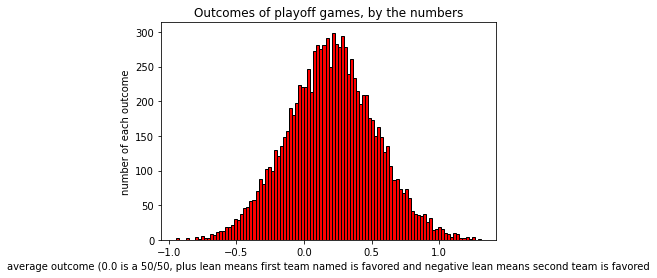

Wildcard game, game 1
Likelihood of  Packers  beating  Cardinals is  73.45 %
Cardinals won


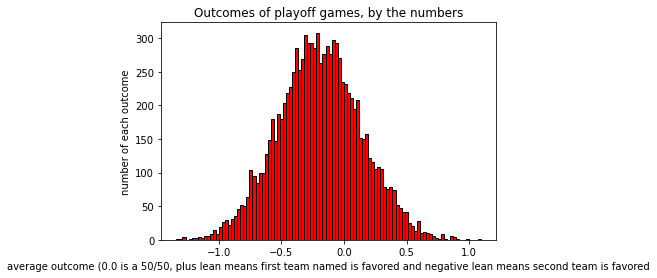

Wildcard game, game 2
Likelihood of  Seahawks  beating  Buccaneers is  26.979999999999997 %
Buccaneers won


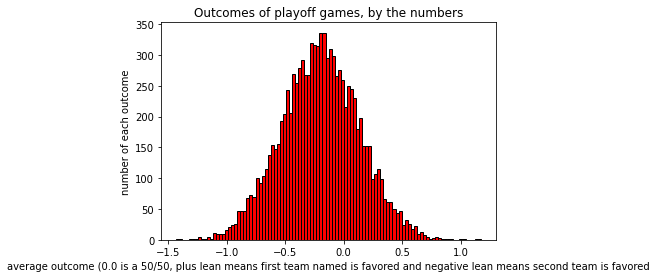

Divisional round game 1, winner of games 1 and 2
Likelihood of  Cardinals  beating  Buccaneers is  27.060000000000002 %
Buccaneers won


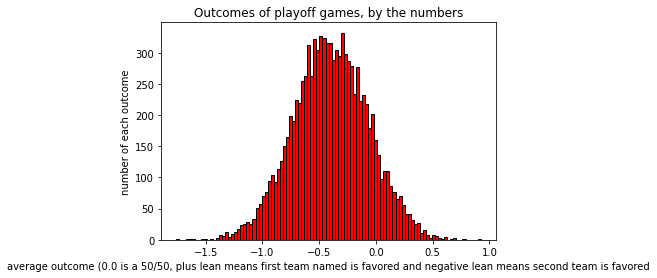

Wildcard round, game 3
Likelihood of  Giants  beating  Rams is  11.0 %
Rams won


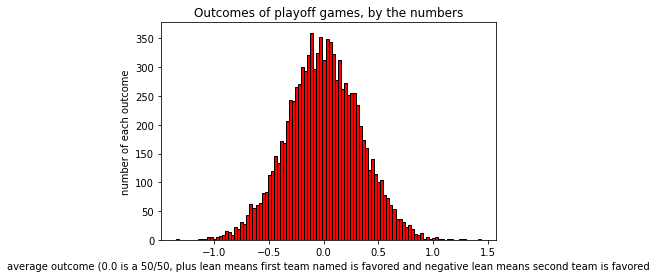

Divisional game 2, winner of wildcard round game 3, and the top seed team since they get a 1st round bye
Likelihood of  Saints  beating  Rams is  49.35 %
Rams won


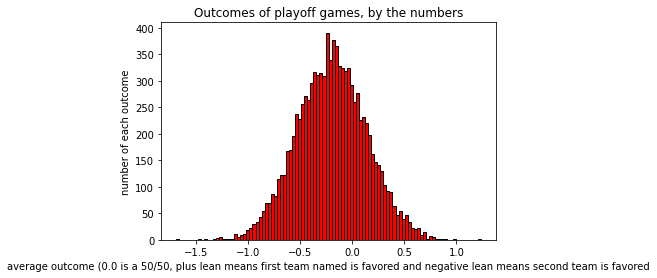

NFC Championship, game betweens the divisional winners
Likelihood of  Buccaneers  beating  Rams is  27.27 %
Rams won, and are going to the superbowl


In [ ]:
#NFC Playoffs

game1(packers, cardinals, "Packers", "Cardinals")

game2(seahawks, buccaneers, "Seahawks","Buccaneers")

if team1w ==1 and team3w == 1:
  game3(team1,team3,w1,w2)
elif team1w ==1 and team3w == 0:
  game3(team1, team4,w1,z2)
elif team1w ==0 and team3w == 0:
  game3(team2, team4,z1,z2)
elif team1w ==0 and team3w == 1:
  game3(team2, team3,z1,w2)


game11(giants, rams, "Giants","Rams")

if team11w ==1:
  game22(saints, team11, "Saints", w11)
else:
  game22(saints, team22, "Saints", z11)

if team5w ==1 and team33w ==1:
  game33(team5 ,team33, w3, w22 )
elif team5w ==1 and team33w ==0:
  game33(team5 ,team44, w3, z22 )
elif team5w ==0 and team33w ==1:
  game33(team6 ,team33, z3, w22 )
elif team5w ==0 and team33w ==0:
  game33(team6 ,team44, z3, z22 )

Then, the AFC bracket advancements:

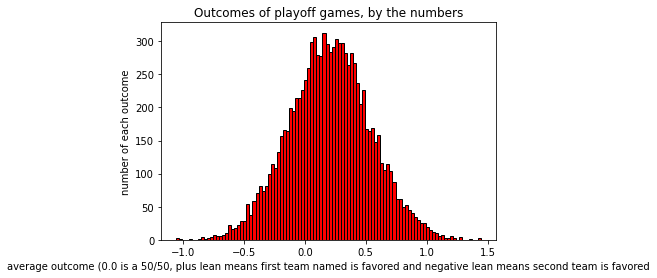

Wildcard game, game 1
Likelihood of  Chiefs  beating  Colts is  73.1 %
Chiefs won


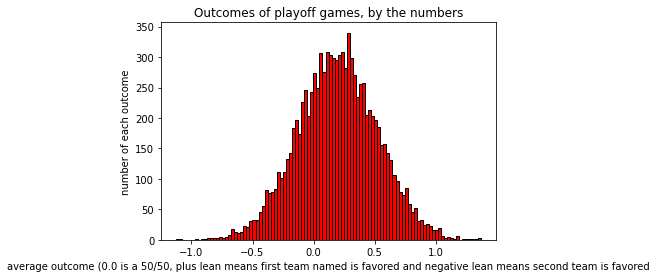

Wildcard game, game 2
Likelihood of  Titans  beating  Dolphins is  72.53 %
Titans won


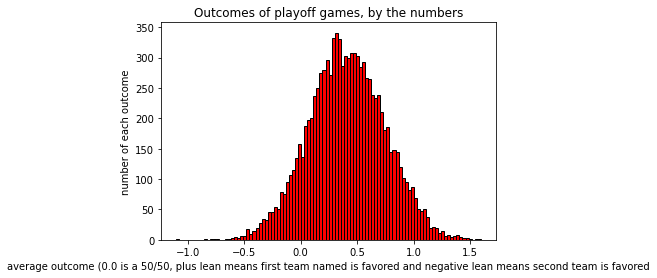

Divisional round game 1, winner of games 1 and 2
Likelihood of  Chiefs  beating  Titans is  88.77000000000001 %
Chiefs won


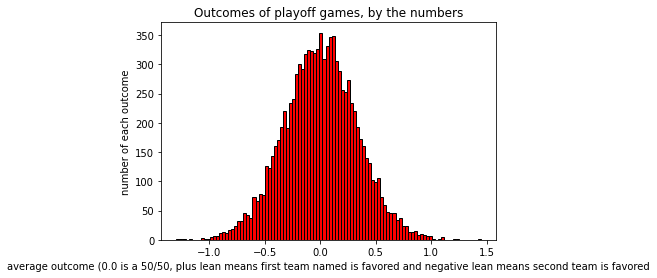

Wildcard round, game 3
Likelihood of  Bills  beating  Browns is  49.85 %
Bills won


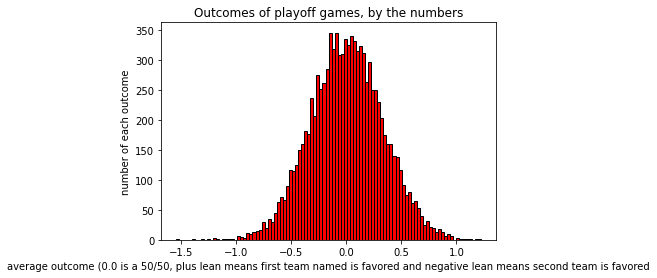

Divisional game 2, winner of wildcard round game 3, and the top seed team since they get a 1st round bye
Likelihood of  Steelers  beating  Bills is  50.1 %
Bills won


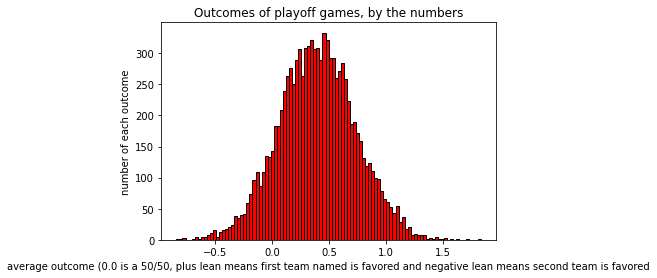

AFC Championship, game betweens the divisional winners
Likelihood of  Chiefs  beating  Bills is  88.39 %
Chiefs won, and are going to the superbowl


In [ ]:
#AFC Playoffs
game1(chiefs, colts, "Chiefs", "Colts")

game2(titans, dolphins, "Titans","Dolphins")

if team1w ==1 and team3w == 1:
  game3(team1,team3,w1,w2)
elif team1w ==1 and team3w == 0:
  game3(team1, team4,w1,z2)
elif team1w ==0 and team3w == 0:
  game3(team2, team4,z1,z2)
elif team1w ==0 and team3w == 1:
  game3(team2, team3,z1,w2)


game11(bills, browns, "Bills","Browns")

if team11w ==1:
  game22(steelers, team11, "Steelers", w11)
else:
  game22(steelers, team22,"Steelers", z11)

if team5w ==1 and team33w ==1:
  game333(team5 ,team33, w3, w22 )
elif team5w ==1 and team33w ==0:
  game333(team5 ,team44, w3, z22 )
elif team5w ==0 and team33w ==1:
  game333(team6 ,team33, z3, w22 )
elif team5w ==0 and team33w ==0:
  game333(team6 ,team44, z3, z22 )

And finally, the winners of each conference play each other in the Superbowl:

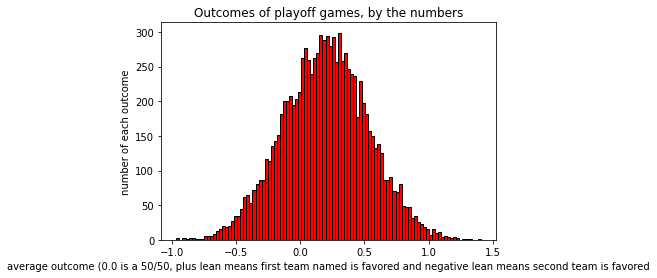

THE SUPERBOWL
Likelihood of  Chiefs  beating  Rams is  72.46000000000001 %
Chiefs won the superbowl


0.2

In [ ]:
#Superbowl

game111(afc_winner, nfc_winner, afc_winner_name, nfc_winner_name)

Ethical implications: We could only reasonably incorporate a few stats into our model; some things we didn't factor into our model include past turnovers and penalties. This limits the accuracy of our predictions. Another setback is the fact that we could only use data up until the end of November, so teams that perform drastically different at the end of their season may not be accurately represented.

The true test of our model will come when the playoffs do, but we have confidence in its accuracy because teams with better stats, such as the Cheifs, end up winning a significant number of times more than teams with lesser stats.

Sources:

“NFL Stat Leaders 2020.” ESPN. ESPN Enterprises, Inc, 2020. http://www.espn.com/.


“NFL Team Yards per Game.” NFL Football Stats - NFL Team Yards per Game. Team Rankings, LLC, 2020. Accessed November 30, 2020. https://www.teamrankings.com/nfl/stat/yards-per-game.

“Pro Football Statistics and History.” Pro Football Reference. Sports Reference, LLC, 2020. https://www.pro-football-reference.com/.